# Proyek Analisis Data: Bike sharing dataset
* Nama: Rava Radithya Razan
* Email: ravarazan@gmail.com
* ID Dicoding: rava-radithya-razan

# Menentukan Pertanyaan Bisnis

* Bagaimana musim dapat mempengaruhi rental sepeda?
* Apa Pengaruh Cuaca terhadap frekuensi rental?
* Kapan jam-jam sibuk untuk penyewaan sepeda pada hari kerja dan akhir pekan, dan bagaimana data ini dapat menginformasikan jadwal staf dan pemeliharaan?

# Menyiapkan semua library yang dibutuhkan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling


## Gathering Data
Menyiapkan data-data yang akan dipakai untuk proses analisis data. Dalam proyek data ini data yang akan dipakai adalah 'Bike Sharing Dataset', lebih tepatnya 'day.csv' dan 'hour.csv'

In [26]:
day_data = pd.read_csv('dashboard/day.csv')
hour_data = pd.read_csv('dashboard/hour.csv')

In [27]:
print('Day Data Head: ')
print(day_data.head(),"\n")
print('Hour Data Head: ')
print(hour_data.head())

Day Data Head: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday   
0        1  2011-01-01       1   0     1        0        6           0  \
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered   
0           2  0.344167  0.363625  0.805833   0.160446     331         654  \
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Dat

## Assessing Data
Pada tahap ini, data akan di identifikasi apakah terdapat masalah di dalam nya seperti missing values, incosistent values, outliers, duplicate data, invalid values, dan innacurate value. Selain itu, disini data akan dipastikan kualitas nya dan akan ditampilkan rangkuman statistik nya.

In [28]:
day_summary = day_data.describe()
day_missing_values = day_data.isnull().sum()

hour_summary = hour_data.describe()
hour_missing_values = hour_data.isnull().sum()


In [29]:
print('Day Data Summary: ')
print(day_summary,"\n") 
print('Day Data Missing Values: ')
print(day_missing_values,"\n")

print('Hour Data Summary: ')
print(hour_summary,"\n")
print('Hour Data Missing Values: ')
print(hour_missing_values,"\n")

Day Data Summary: 
          instant      season          yr        mnth     holiday     weekday   
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  \
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed   
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  \
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std     

## Cleaning Data
Dikarenakan tidak terdapat hal yang harus dibersihkan dari dataset diatas, maka tahap cleaning data tidak perlu dilakukan.

## Exploratory Data Analysis
Di tahap ini data akan melewati proses analisis untuk mencari pola yang bersangkutan dengan musim dan cuaca, lalu menganalisis distribusi rental sepeda dalam jam-jam yang berbeda dalam 1 hari.

In [30]:
sns.set_style('whitegrid')

seasonality = day_data.groupby('season')['cnt'].sum().reset_index().replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
weather = day_data.groupby('weathersit')['cnt'].sum().reset_index().replace([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])


In [31]:
hour_data['is_weekend'] = hour_data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
peak_hours_weekday = hour_data[hour_data['is_weekend'] == 0].groupby('hr')['cnt'].mean().reset_index()
peak_hours_weekend = hour_data[hour_data['is_weekend'] == 1].groupby('hr')['cnt'].mean().reset_index()

In [32]:
print('Seasonality: ')
print(seasonality,"\n")
print('Weather: ')
print(weather,"\n")
print('Peak Hours weekday: ')
print(peak_hours_weekday,"\n")
print('Peak Hours weekend: ')
print(peak_hours_weekend,"\n")

Seasonality: 
   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613 

Weather: 
   weathersit      cnt
0       Clear  2257952
1        Mist   996858
2  Light Snow    37869 

Peak Hours weekday: 
    hr         cnt
0    0   37.626692
1    1   17.464078
2    2    9.377953
3    3    5.188525
4    4    5.446939
5    5   24.331395
6    6   99.485493
7    7  282.145068
8    8  464.557060
9    9  238.661509
10  10  138.133462
11  11  161.897485
12  12  204.320463
13  13  202.479769
14  14  187.728324
15  15  203.913295
16  16  292.280769
17  17  515.915385
18  18  483.184971
19  19  343.277457
20  20  246.815029
21  21  184.620424
22  22  137.194605
23  23   87.462428 

Peak Hours weekend: 
    hr         cnt
0    0   94.148325
1    1   72.583732
2    2   55.980676
3    3   26.995215
4    4    8.497585
5    5    8.487562
6    6   17.778846
7    7   39.533333
8    8   99.166667
9    9  171.666667
10  10  261.152381
11  11  321.995238
12  12  374.171429


# Data Visualization
Pada tahap ini, data yang telah melewati tahap Exploratory Data Analysis (EDA) akan dibuatkan visualisasi nya, dan visualisasi nya harus berdasarkan dari pertanyaan bisnis.

## Bagaimana musim dapat mempengaruhi rental sepeda?

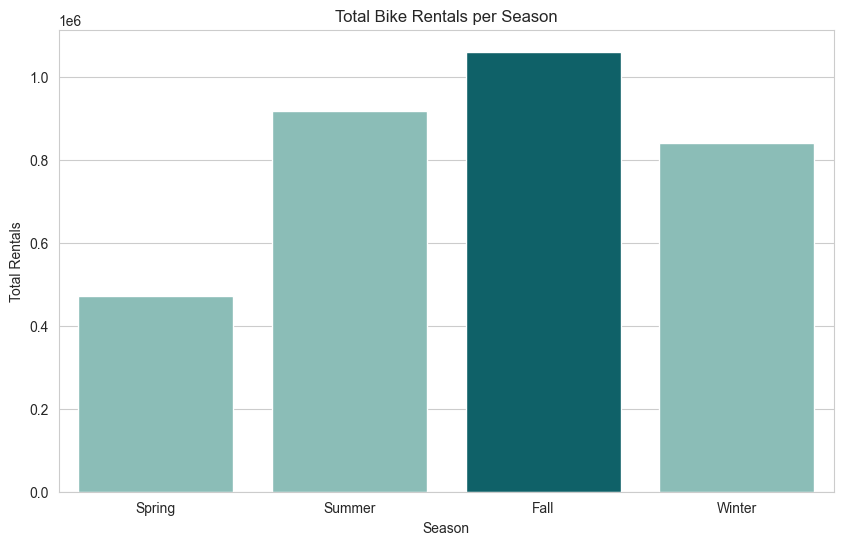

In [33]:
plt.figure(figsize=(10, 6))
colors = ['#83c5be', '#83c5be', '#006d77', '#83c5be']

sns.barplot(x="season", y="cnt", data=seasonality, palette=colors, hue="season")
plt.title("Total Bike Rentals per Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

## Apa Pengaruh Cuaca terhadap frekuensi rental?

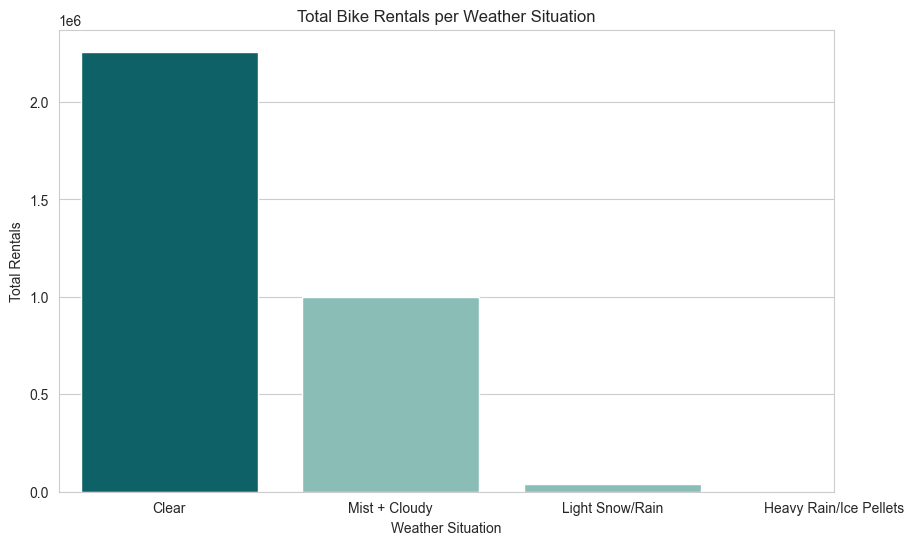

In [34]:
plt.figure(figsize=(10, 6))
color = [
    "#006d77",
    "#83c5be",
    "#83c5be",
]
sns.barplot(x="weathersit", y="cnt", data=weather, palette=color, hue="weathersit")
plt.title("Total Bike Rentals per Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Clear", "Mist + Cloudy", "Light Snow/Rain", "Heavy Rain/Ice Pellets"],
)
plt.show()

## Kapan jam-jam sibuk untuk penyewaan sepeda pada hari kerja dan akhir pekan, dan bagaimana data ini dapat menginformasikan jadwal staf dan pemeliharaan?

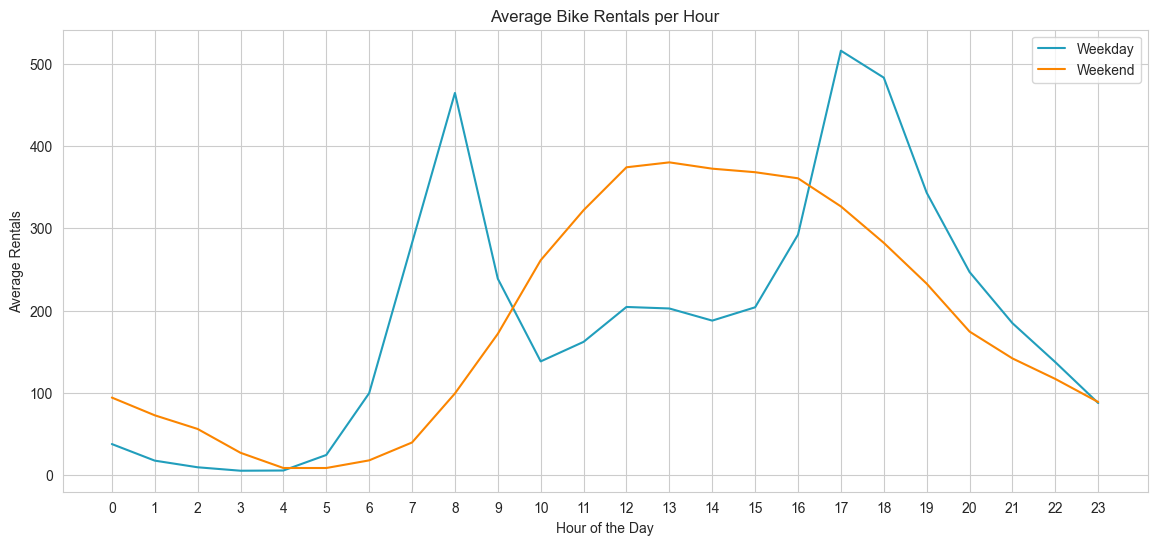

In [35]:
plt.figure(figsize=(14, 6))
plt.plot(peak_hours_weekday['hr'], peak_hours_weekday['cnt'], label='Weekday', color='#219ebc')
plt.plot(peak_hours_weekend['hr'], peak_hours_weekend['cnt'], label='Weekend', color='#fb8500')
plt.title('Average Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Explanatory Analysis
Pada tahap ini, data yang telah melewati exploratory data analysis (EDA) dan visualisasi akan diterjemahkan, yang nanti nya akan membuahkan sebuah hasil dalam bentuk kesimpulan dan juga insights yang akan menjawab pertanyaan bisnis.

In [36]:
seasonality_summary = seasonality.sort_values('cnt', ascending=False).reset_index()
weather_summary = weather.sort_values('cnt', ascending=False).reset_index()

In [41]:
peak_hours = hour_data.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()
peak_hours_summary = peak_hours.pivot(index='hr', columns='is_weekend', values='cnt').reset_index()
peak_hours_summary['Difference'] = peak_hours_summary[1] - peak_hours_summary[0]
peak_hours_sorted = peak_hours_summary.sort_values('Difference', ascending=False).reset_index()

In [ ]:
print('Seasonality Summary:')
print(seasonality_summary)
print('\nWeather Summary:')
print(weather_summary)
print('\nPeak Hours Summary (Top 5 Hours with Biggest Difference between Weekend and Weekday):')
print(peak_hours_sorted.head(5))

Seasonality Summary:
   index  season      cnt
0      2    Fall  1061129
1      1  Summer   918589
2      3  Winter   841613
3      0  Spring   471348

Weather Summary:
   index  weathersit      cnt
0      0       Clear  2257952
1      1        Mist   996858
2      2  Light Snow    37869

Peak Hours Summary (Top 5 Hours with Biggest Difference between Weekend and Weekday):
day_type  index  hr  Weekday  Weekend  Difference
0             2   2     4764    11588        6824
1             1   1     8994    15170        6176
2             3   3     2532     5642        3110
3             0   0    19453    19677         224
4             4   4     2669     1759        -910


# Conclusion
* Musim panas dan musim gugur menunjukkan tingkat penyewaan sepeda yang lebih tinggi dibandingkan dengan musim semi dan musim dingin..

* Hari-hari yang cerah memiliki tingkat penyewaan sepeda paling tinggi, sementara hari-hari dengan hujan lebat atau hujan es paling sedikit.

* Pada hari kerja, jam sibuk adalah sekitar pukul 8 pagi dan 5 sore, bertepatan dengan jam-jam perjalanan. Pada akhir pekan, polanya lebih tersebar dengan puncaknya di sore hari.

Insight ini dapat digunakan untuk mengoptimalkan ketersediaan sepeda, jadwal perawatan, dan staf, terutama pada jam-jam sibuk dan musim atau kondisi cuaca yang menguntungkan.